In [140]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
#Loading the dataset
df=pd.read_csv("Uber-Jan-Feb-FOIL.csv ")

In [5]:
print(df.head())

  dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537


In [7]:
print(df.tail())

    dispatching_base_number       date  active_vehicles  trips
349                  B02764  2/28/2015             3952  39812
350                  B02617  2/28/2015             1372  14022
351                  B02682  2/28/2015             1386  14472
352                  B02512  2/28/2015              230   1803
353                  B02765  2/28/2015              747   7753


In [9]:
print(df.columns)

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')


In [11]:
print(df.dtypes)

dispatching_base_number    object
date                       object
active_vehicles             int64
trips                       int64
dtype: object


In [13]:
#check for missing data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None


In [15]:
#Summarizing numerical data
print(df.describe())

       active_vehicles         trips
count       354.000000    354.000000
mean       1307.435028  11667.316384
std        1162.510626  10648.284865
min         112.000000    629.000000
25%         296.750000   2408.500000
50%        1077.000000   9601.000000
75%        1417.000000  13711.250000
max        4395.000000  45858.000000


##Data Preprocessing

In [18]:
#check for null values
print(df.isnull().sum())

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64


In [20]:
#Check for dupplicate values
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: xlabel='active_vehicles'>

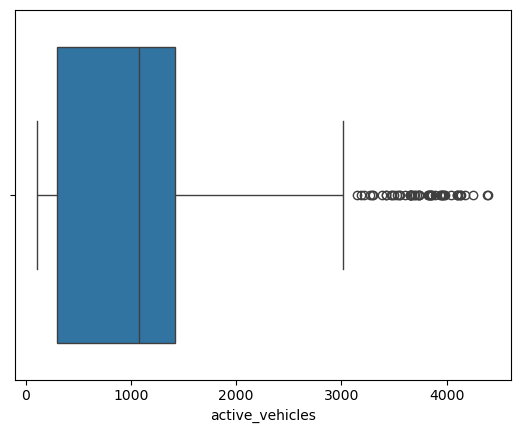

In [22]:
#check for outliers
sns.boxplot(x=df['active_vehicles'])

<Axes: ylabel='trips'>

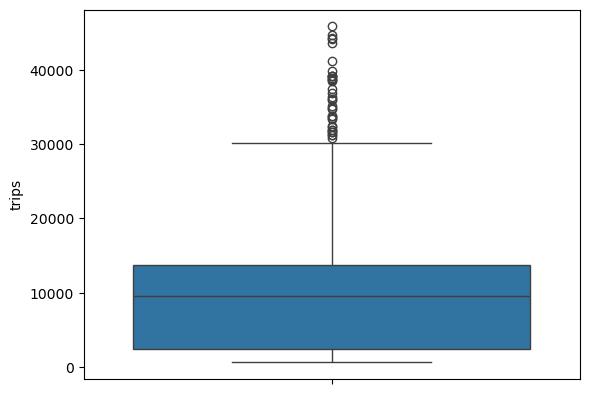

In [24]:
sns.boxplot(y=df['trips'])

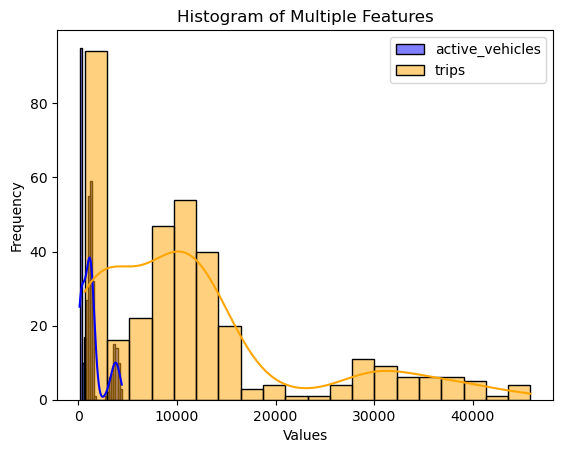

In [26]:
# Overlay histograms for multiple features
sns.histplot(df['active_vehicles'], bins=20, alpha=0.5, label='active_vehicles', color='blue',kde=True)
sns.histplot(df['trips'], bins=20, alpha=0.5, label='trips', color='orange',kde=True)
plt.title('Histogram of Multiple Features')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [28]:
columns_to_check = ['active_vehicles', 'trips'] 

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers)


Outliers in active_vehicles:
    dispatching_base_number       date  active_vehicles  trips
2                    B02764   1/1/2015             3427  29421
11                   B02764   1/2/2015             3147  19974
17                   B02764   1/3/2015             3215  29729
27                   B02764   1/5/2015             3387  20926
30                   B02764   1/6/2015             3473  25301
38                   B02764   1/7/2015             3603  29949
46                   B02764   1/8/2015             3831  33802
50                   B02764   1/9/2015             3820  33517
58                   B02764  1/10/2015             3558  38864
63                   B02764  1/11/2015             3186  27681
66                   B02764  1/12/2015             3499  26852
76                   B02764  1/13/2015             3658  29983
78                   B02764  1/14/2015             3736  29550
88                   B02764  1/15/2015             3840  31214
92                   B0276

Random Forests are robust to outliers, and including them might improve predictions for extreme cases.

In [103]:
df['date'] = pd.to_datetime(df['date'], errors='coerce',format='%m-%d-%Y %H:%M:%S')
df.head(5)


,dispatching_base_number,date,active_vehicles,trips,Day,month
0,B02512,2015-01-01,190,1132,1,1
1,B02765,2015-01-01,225,1765,1,1
2,B02764,2015-01-01,3427,29421,1,1
3,B02682,2015-01-01,945,7679,1,1
4,B02617,2015-01-01,1228,9537,1,1


In [73]:
#After converting the date to datetime
print(df.dtypes)

dispatching_base_number            object
date                       datetime64[ns]
active_vehicles                     int64
trips                               int64
Day                                 int32
month                               int32
dtype: object


In [81]:
#Extracting useful information from date column
df['Day']=df['date'].dt.day
df['month']=df['date'].dt.month
df.head()

,dispatching_base_number,date,active_vehicles,trips,Day,month
0,B02512,2015-01-01,190,1132,1,1
1,B02765,2015-01-01,225,1765,1,1
2,B02764,2015-01-01,3427,29421,1,1
3,B02682,2015-01-01,945,7679,1,1
4,B02617,2015-01-01,1228,9537,1,1


In [91]:
#count the number of trips per day
trips_per_day=df.groupby('Day').size()
print(trips_per_day)

Day
1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
13    12
14    12
15    12
16    12
17    12
18    12
19    12
20    12
21    12
22    12
23    12
24    12
25    12
26    12
27    12
28    12
29     6
30     6
31     6
dtype: int64


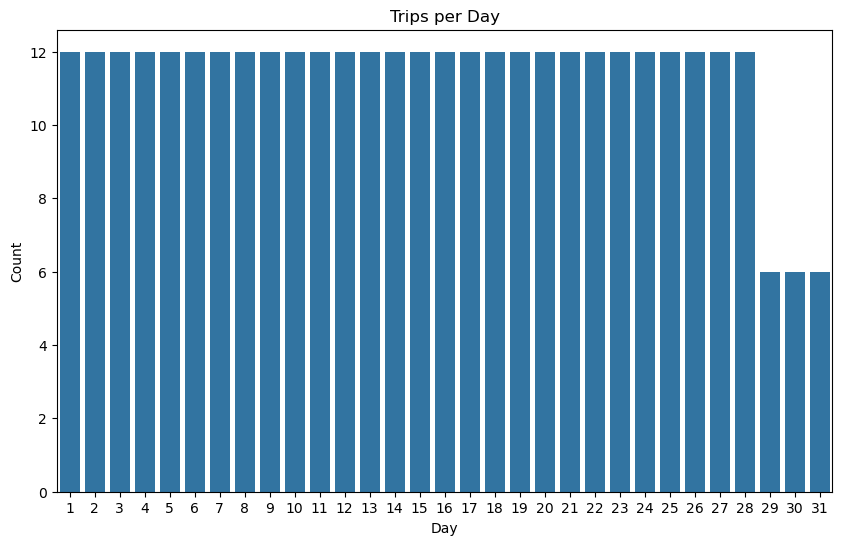

In [113]:
#Exploratory Data Analysis
#plotting the number if trips per day
plt.figure(figsize=(10,6))
sns.barplot(x=trips_per_day.index,y=trips_per_day.values)
plt.title("Trips per Day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

In [105]:
#count the number of trips per month
trips_per_month=df.groupby('month').size()
print(trips_per_month)

month
1    186
2    168
dtype: int64


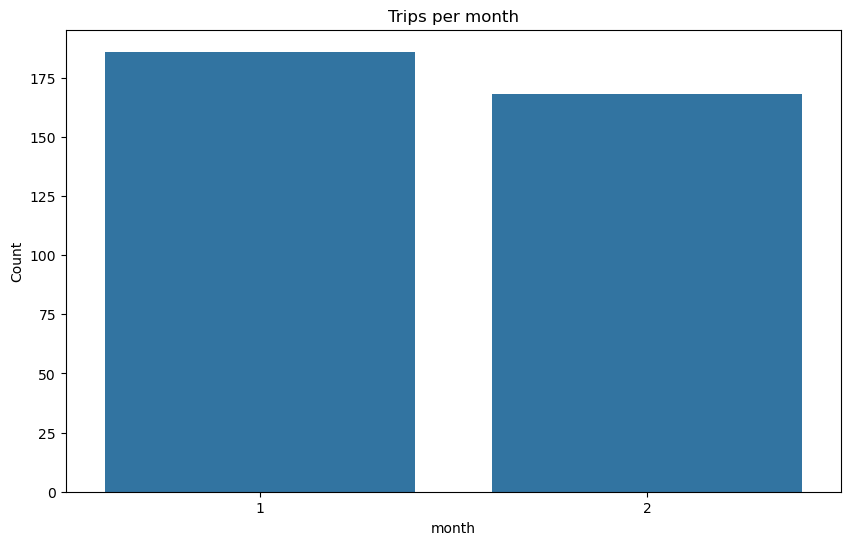

In [115]:
#plotting the number if trips per day
plt.figure(figsize=(10,6))
sns.barplot(x=trips_per_month.index,y=trips_per_month.values)
plt.title("Trips per month")
plt.xlabel("month")
plt.ylabel("Count")
plt.show()

Feature Engineering

In [124]:
df = pd.get_dummies(df, columns=['dispatching_base_number'], drop_first=True)


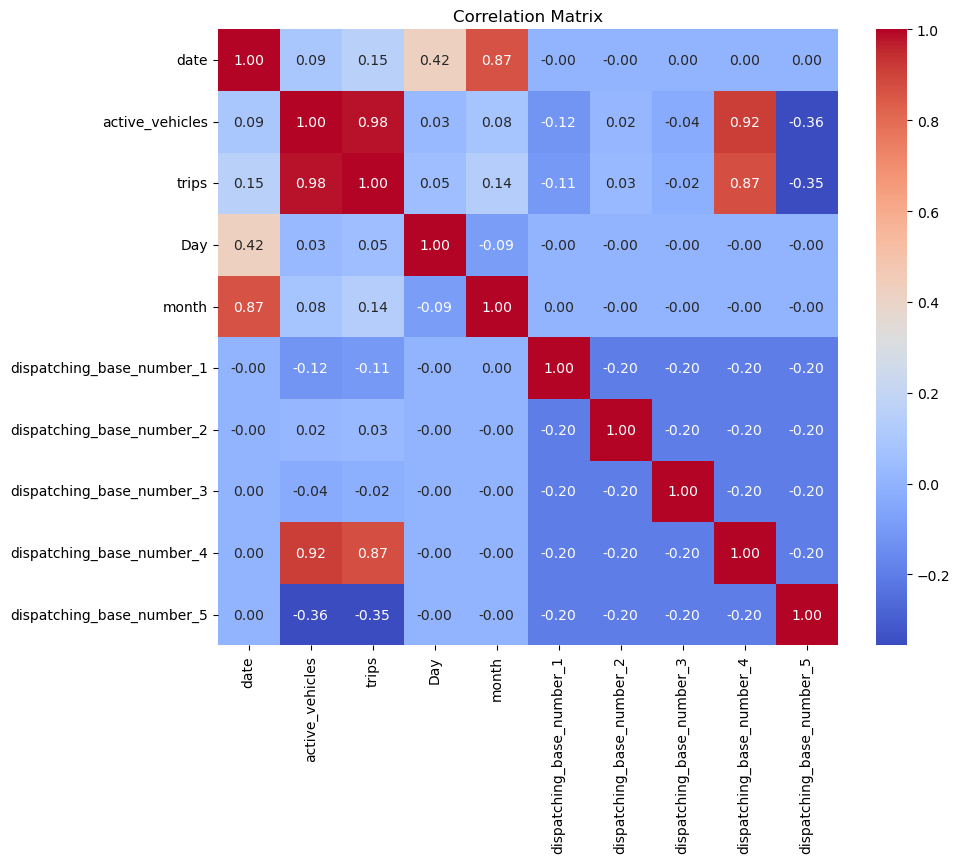

In [126]:
# Correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [128]:
df.columns


Index(['date', 'active_vehicles', 'trips', 'Day', 'month',
       'dispatching_base_number_1', 'dispatching_base_number_2',
       'dispatching_base_number_3', 'dispatching_base_number_4',
       'dispatching_base_number_5'],
      dtype='object')

In [130]:
# Example: Define features and target
features = [
    'active_vehicles', 
    'Day', 
    'month', 
    'dispatching_base_number_1', 
    'dispatching_base_number_2', 
    'dispatching_base_number_3', 
    'dispatching_base_number_4', 
    'dispatching_base_number_5'
]
target = 'trips'

# Define X (features) and y (target)
X = df[features]
y = df[target]

# Check shapes
print(X.shape)
print(y.shape)

(354, 8)
(354,)


In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (283, 8)
X_test shape: (71, 8)
y_train shape: (283,)
y_test shape: (71,)


Model Building

In [135]:
#Train a Random Forest Regressor
rfr=RandomForestRegressor(random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [137]:
#Predict on the test data
y_pred=rfr.predict(X_test)

Model Evaluation

In [142]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1220.0864788732392
Mean Squared Error (MSE): 4085589.9443859155
Root Mean Squared Error (RMSE): 2021.2842314691707
R² Score: 0.9621106913935219


In [146]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rfr, X, y, cv=5, scoring='r2')  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean R² Score:", cv_scores.mean())


Cross-Validation Scores: [0.92571509 0.9402003  0.95281039 0.96965516 0.97182561]
Mean R² Score: 0.9520413095124258


In [148]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'n_estimators': 200}


In [152]:
train_r2 = rfr.score(X_train, y_train)
test_r2 = rfr.score(X_test, y_test)

print("Training R² Score:", train_r2)
print("Testing R² Score:", test_r2)


Training R² Score: 0.9929665833805471
Testing R² Score: 0.9621106913935219


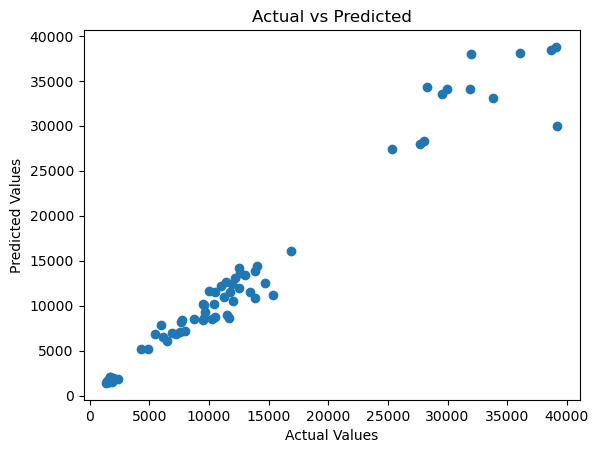

In [154]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()